<center><h1>Assignment 6 </h1></center>



## PANDAS 


### Q1- Create a Pandas Data frame from the given data and create a new column “Voter” based on voter age, i.e., if age >18 then voter column should be “Yes” otherwise if age <18 then voter column should be “No”

```python
raw_Data = {'Voter_name': ['Geek1', 'Geek2', 'Geek3', 'Geek4',
'Geek5', 'Geek6', 'Geek7', 'Geek8'],
'Voter_age': [15, 23, 25, 9, 67, 54, 42, np.NaN]}
```

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # To ignore unnecessary warnings

In [2]:
raw_Data = {'Voter_name': ['Geek1', 'Geek2', 'Geek3', 'Geek4',
'Geek5', 'Geek6', 'Geek7', 'Geek8'],
'Voter_age': [15, 23, 25, 9, 67, 54, 42, np.NaN]}

df = pd.DataFrame(raw_Data) # convert dictionary raw_Data into a Data Frame.

df

,Voter_name,Voter_age
0,Geek1,15.0
1,Geek2,23.0
2,Geek3,25.0
3,Geek4,9.0
4,Geek5,67.0
5,Geek6,54.0
6,Geek7,42.0
7,Geek8,NaN


#### Handling Missing Values

In [3]:
df.info() # Check count of not-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Voter_name  8 non-null      object 
 1   Voter_age   7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 260.0+ bytes


In [4]:
row_with_NaN = df[df['Voter_age'].isnull()] # finding the row with null values
row_with_NaN

,Voter_name,Voter_age
7,Geek8,NaN


#### 1. DROP MISSING VALUE (or) NAN

In [5]:
df_droppedValue = df.dropna() # save the Data Frame after droping null values
df_droppedValue

,Voter_name,Voter_age
0,Geek1,15.0
1,Geek2,23.0
2,Geek3,25.0
3,Geek4,9.0
4,Geek5,67.0
5,Geek6,54.0
6,Geek7,42.0


In [6]:
# Create a function for checking out the Voting_age is above 18 or below

def voting_age(age):
    if age > 18:
        return 'Yes'
    else:
        return 'No'

In [7]:
# Creating another column 'Voter' to save Yes or No according to their age
df_droppedValue['Voter'] = df_droppedValue['Voter_age'].apply(voting_age)
df_droppedValue

,Voter_name,Voter_age,Voter
0,Geek1,15.0,No
1,Geek2,23.0,Yes
2,Geek3,25.0,Yes
3,Geek4,9.0,No
4,Geek5,67.0,Yes
5,Geek6,54.0,Yes
6,Geek7,42.0,Yes


#### 2. Impute Missing Value (or) NaN with the mean()

In [8]:
# coping the data frame in other variable df_mean for experimentation impute with mean() 
df_mean = df
mean_age = df_mean['Voter_age'].mean()

# fill the null value (or) missing value with the median value
df_mean['Voter_age'] = df_mean['Voter_age'].fillna(mean_age)

# Creating another column 'Voter' to save Yes or No according to their age
df_mean['Voter'] = df_mean['Voter_age'].apply(voting_age)
df_mean

,Voter_name,Voter_age,Voter
0,Geek1,15.000000,No
1,Geek2,23.000000,Yes
2,Geek3,25.000000,Yes
3,Geek4,9.000000,No
4,Geek5,67.000000,Yes
5,Geek6,54.000000,Yes
6,Geek7,42.000000,Yes
7,Geek8,33.571429,Yes


#### 3. Impute Missing Value (or) NaN with median()

In [9]:
# coping the data frame in other variable df_median for experimentation impute with median() 
df_median = df
median_age = df_median['Voter_age'].median()

# fill the null value (or) missing value with the median value
df_median['Voter_age'] = df_median['Voter_age'].fillna(median_age)

# Creating another column 'Voter' to save Yes or No according to their age
df_median['Voter'] = df_median['Voter_age'].apply(voting_age)
df_median

,Voter_name,Voter_age,Voter
0,Geek1,15.000000,No
1,Geek2,23.000000,Yes
2,Geek3,25.000000,Yes
3,Geek4,9.000000,No
4,Geek5,67.000000,Yes
5,Geek6,54.000000,Yes
6,Geek7,42.000000,Yes
7,Geek8,33.571429,Yes


### Q2 – Create a Pandas Data frame from the given data and collapse First and Last column into one column as Full Name, so the output contains Full Name and Age, then convert column age to index

```python
raw_Data = {'First': ['Manan ', 'Raghav ', 'Sunny '],
'Last': ['Goel', 'Sharma', 'Chawla'],
'Age' : [12, 24, 56]}
```

#### Step 1: Creating DataFrame()

In [10]:
raw_Data = {'First': ['Manan ', 'Raghav ', 'Sunny '],
'Last': ['Goel', 'Sharma', 'Chawla'],
'Age' : [12, 24, 56]}

df = pd.DataFrame(raw_Data)

df

,First,Last,Age
0,Manan,Goel,12
1,Raghav,Sharma,24
2,Sunny,Chawla,56


#### Step 2: Checking Null values (or) Missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   First   3 non-null      object
 1   Last    3 non-null      object
 2   Age     3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [12]:
df.isnull().sum()

First    0
Last     0
Age      0
dtype: int64

#### Step 3: Collapse columns 'First' and 'Last' into new column 'Full Name'

In [13]:
df['Full Name'] = df['First'] + ' ' + df['Last']

df

,First,Last,Age,Full Name
0,Manan,Goel,12,Manan Goel
1,Raghav,Sharma,24,Raghav Sharma
2,Sunny,Chawla,56,Sunny Chawla


#### Step 4: Drop the columns 'First' and 'Last' (they are of no use)

In [14]:
df.drop(['First', 'Last'], axis=1, inplace=True)
df

,Age,Full Name
0,12,Manan Goel
1,24,Raghav Sharma
2,56,Sunny Chawla


#### Step 5: Set column 'Age' as index

In [15]:
df.set_index('Age', inplace=True)

In [16]:
df

,Full Name
Age,
12,Manan Goel
24,Raghav Sharma
56,Sunny Chawla


### Q3- Create a Pandas Data frame from the given data -

```python
raw_Data = {'Date':['10/2/2011', '11/2/2011', '12/2/2011', '13/2/2011'],
'Product':['Umbrella', 'Matress', 'Badminton','Shuttle'],
'Price':[1250, 1450, 1550, 400],
'Expense': [ 21525220.653, 31125840.875, 23135428.768, 56245263.942]}
```

In [17]:
raw_Data = {'Date':['10/2/2011', '11/2/2011', '12/2/2011', '13/2/2011'],
'Product':['Umbrella', 'Matress', 'Badminton','Shuttle'],
'Price':[1250, 1450, 1550, 400],
'Expense': [ 21525220.653, 31125840.875, 23135428.768, 56245263.942]}

df = pd.DataFrame(raw_Data)

df

,Date,Product,Price,Expense
0,10/2/2011,Umbrella,1250,2.152522e+07
1,11/2/2011,Matress,1450,3.112584e+07
2,12/2/2011,Badminton,1550,2.313543e+07
3,13/2/2011,Shuttle,400,5.624526e+07


#### a)  Add Index as Item1, Item2, Item3, Item4

In [18]:
# Add Index as Item1, Item2, Item3, Item4
df.index = ['Item1', 'Item2', 'Item3', 'Item4']
df

,Date,Product,Price,Expense
Item1,10/2/2011,Umbrella,1250,2.152522e+07
Item2,11/2/2011,Matress,1450,3.112584e+07
Item3,12/2/2011,Badminton,1550,2.313543e+07
Item4,13/2/2011,Shuttle,400,5.624526e+07


#### b)  Find the index labels of all items whose ‘Price’ is greater than 1000.

In [19]:
# Index labels of items whose ‘Price’ is greater than 1000
high_price_items = df[df['Price'] > 1000].index

high_price_items

Index(['Item1', 'Item2', 'Item3'], dtype='object')

#### c) Replace products using Map() with respective codes- Umbrella : ‘U’, Matress : 'M', Badminton : 'B', Shuttle: 'S'

In [20]:
# Replace products using Map() with respective codes
product_map = {'Umbrella': 'U', 'Matress': 'M', 'Badminton': 'B', 'Shuttle': 'S'}
df['Product'] = df['Product'].map(product_map)
df

,Date,Product,Price,Expense
Item1,10/2/2011,U,1250,2.152522e+07
Item2,11/2/2011,M,1450,3.112584e+07
Item3,12/2/2011,B,1550,2.313543e+07
Item4,13/2/2011,S,400,5.624526e+07


#### d) Round off the Expense column values to two decimal places.

In [21]:
# Round off the Expense column values to two decimal places
df['Expense'] = df['Expense'].round(2)
df

,Date,Product,Price,Expense
Item1,10/2/2011,U,1250,21525220.65
Item2,11/2/2011,M,1450,31125840.88
Item3,12/2/2011,B,1550,23135428.77
Item4,13/2/2011,S,400,56245263.94


#### e) Create a new column called ‘Discounted_Price’ after applying a 10% discount on the existing‘price’ column. (try using lambda function)


In [22]:
# Create a new column called ‘Discounted_Price’ after applying a 10% discount
df['Discounted_Price'] = df['Price'].apply(lambda x: x * 0.9)
df

,Date,Product,Price,Expense,Discounted_Price
Item1,10/2/2011,U,1250,21525220.65,1125.0
Item2,11/2/2011,M,1450,31125840.88,1305.0
Item3,12/2/2011,B,1550,23135428.77,1395.0
Item4,13/2/2011,S,400,56245263.94,360.0


#### f) Convert the column type of “Date” to datetime format

In [23]:
# Convert the column type of “Date” to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Product,Price,Expense,Discounted_Price
Item1,2011-10-02,U,1250,21525220.65,1125.0
Item2,2011-11-02,M,1450,31125840.88,1305.0
Item3,2011-12-02,B,1550,23135428.77,1395.0
Item4,2011-02-13,S,400,56245263.94,360.0


#### g) Create a column rank which ranks the products based on the price (one with the highest price will be rank 1).

In [24]:
# Create a column rank which ranks the products based on the price
df['Rank'] = df['Price'].rank(ascending=False).astype(int)
df

,Date,Product,Price,Expense,Discounted_Price,Rank
Item1,2011-10-02,U,1250,21525220.65,1125.0,3
Item2,2011-11-02,M,1450,31125840.88,1305.0,2
Item3,2011-12-02,B,1550,23135428.77,1395.0,1
Item4,2011-02-13,S,400,56245263.94,360.0,4


# Assignment: Exploring NBA Player Data

Download the nba.csv file containing NBA player data Complete the following tasks using
Python, Pandas, and data visualization libraries:

#### 1. Load Data:
    ● Load the nba.csv data into a Pandas DataFrame.
    ● Display basic information about the DataFrame.
#### 2. Data Cleaning:
    ● Handle missing values by either removing or imputing them.
    ● Remove duplicate rows.
#### 3. Data Transformation:
    ● Create a new column 'BMI' (Body Mass Index) using the formula: BMI = (weight in pounds / (height in inches)^2) * 703.(Assuming a fixed height value of 70 inches (5 feet 10 inches)
#### 4. Exploratory Data Analysis (EDA):
    ● Display summary statistics of the 'age', 'weight', and 'salary' columns.
    ● Calculate the average age, weight, and salary of players in each 'position' category.
#### 5. Data Visualization:
    ● Create a histogram of player ages.
    ● Create a boxplot of player salaries for each 'position'.
    ● Plot a scatter plot of 'age' vs. 'salary' with a different color for each 'position'.
#### 6. Top Players:
    ● Display the top 10 players with the highest salaries.
#### 7. College Analysis:
    ● Determine the top 5 colleges with the most represented players.
#### 8. Position Distribution:
    ● Plot a pie chart to show the distribution of players across different 'positions'.
#### 9. Team Analysis:
    ● Display the average salary of players for each 'team'.
    ● Plot a bar chart to visualize the average salary of players for each 'team'.
    
#### 10. Extras
    ● Get the index at which the minimum weight value is present.
    ● Sort values based on name in alphabetical order for the rows (the original Dataframe sorting should not change)
    ● Create a series from given dataframe on “name” column and display top and last 10

In [25]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # To ignore unnecessary warnings

#### 1. Load Data:

● Load the nba.csv data into a Pandas DataFrame.

In [26]:
df = pd.read_csv('dataset/nba.csv')
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0


● Display basic information about the DataFrame.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Weight    457 non-null    int64  
 6   College   373 non-null    object 
 7   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.7+ KB


#### Observations:

1. The dataset contains 457 entries and 8 columns, including 'Name', 'Team', 'Number', 'Position', 'Age', 'Weight', 'College', and 'Salary'.
<br>

2. Some entries have missing values, particularly in the 'College' and 'Salary' columns. There are 373 non-null values in the 'College' column and 446 non-null values in the 'Salary' column.
<br>

3. The data types differ across the columns, with 'Name', 'Team', 'Position', and 'College' being of the object data type, 'Number', 'Age', and 'Weight' being of the int64 data type, and 'Salary' being of the float64 data type.
<br>

4. The dataset presents information related to player attributes such as age, weight, and position, as well as their respective salaries.
<br>

5. The 'Age' and 'Weight' columns are complete, containing 457 non-null entries, indicating that there are no missing values in these columns.
<br>

6. The 'Number' column seems to represent the jersey number of the players in the dataset.
<br>

7. The 'Salary' column has numeric values, indicating the players' salaries, while the 'College' column represents the college where the players attended.

#### 2. Data Cleaning:

● Handle missing values by either removing or imputing them.

In [28]:
df.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Weight       0
College     84
Salary      11
dtype: int64

In [29]:
df[df['College'].isnull()] 

,Name,Team,Number,Position,Age,Weight,College,Salary
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,240,NaN,12000000.0
15,Bojan Bogdanovic,Brooklyn Nets,44,SG,27,216,NaN,3425510.0
20,Sergey Karasev,Brooklyn Nets,10,SG,22,208,NaN,1599840.0
32,Thanasis Antetokounmpo,New York Knicks,43,SF,23,205,NaN,30888.0
...,...,...,...,...,...,...,...,...
445,Dante Exum,Utah Jazz,11,PG,20,190,NaN,3777720.0
447,Rudy Gobert,Utah Jazz,27,C,23,245,NaN,1175880.0
450,Joe Ingles,Utah Jazz,2,SF,28,226,NaN,2050000.0
454,Raul Neto,Utah Jazz,25,PG,24,179,NaN,900000.0


In [30]:
df[df['Salary'].isnull()] 

,Name,Team,Number,Position,Age,Weight,College,Salary
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN
46,Elton Brand,Philadelphia 76ers,42,PF,37,254,Duke,NaN
171,Dahntay Jones,Cleveland Cavaliers,30,SG,35,225,Duke,NaN
264,Jordan Farmar,Memphis Grizzlies,4,PG,29,180,UCLA,NaN
269,Ray McCallum,Memphis Grizzlies,5,PG,24,190,Detroit,NaN
270,Xavier Munford,Memphis Grizzlies,14,PG,24,180,Rhode Island,NaN
273,Alex Stepheson,Memphis Grizzlies,35,PF,28,270,USC,NaN
350,Briante Weber,Miami Heat,12,PG,23,165,Virginia Commonwealth,NaN
353,Dorell Wright,Miami Heat,11,SF,30,205,NaN,NaN
397,Axel Toupane,Denver Nuggets,6,SG,23,210,NaN,NaN


- High Percentage of Missing Values: The 'College' column has a large number of missing values (NaNs) and removing a substantial portion of the rows with missing 'College' data may lead to a loss of valuable information.

- **Irrelevance:** In the context of this dataset, the college from which a player graduated may not significantly impact the analysis of player performance, salaries, or other key features.

- **Imputation Challenge:** Given the categorical nature of the 'College' column, imputing the missing values with a specific college name may introduce bias and inaccuracies into the analysis.

In [31]:
df.dropna(subset = ['College'], inplace=True)

<Figure size 1000x600 with 0 Axes>

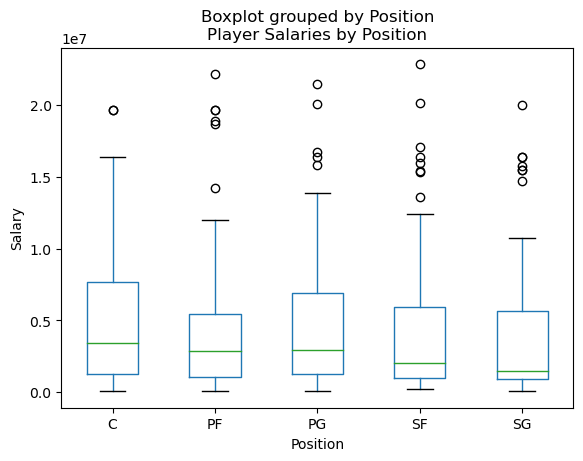

In [32]:
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='Salary', by='Position', grid=False)
plt.title('Player Salaries by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

- In Salary columns we can see many outliers are there so if we want to imput the NaN values we should have to go with median istead of mean

In [33]:
df.fillna(df.median(), inplace=True)

In [34]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Weight      0
College     0
Salary      0
dtype: int64

● Remove duplicate rows

In [35]:
df.drop_duplicates(inplace=True)

#### 3. Data Transformation:

- Create a new column 'BMI' (Body Mass Index) using the formula:

<center><code>BMI = (weight in pounds / (height in inches)^2) * 703`.</code></center>
 (Assuming a fixed height value of 70 inches (5 feet 10 inches)

In [36]:
df['BMI'] = (df['Weight'] / (70 ** 2)) * 703

In [37]:
df

,Name,Team,Number,Position,Age,Weight,College,Salary,BMI
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0,25.824490
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0,33.715306
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,2515440.0,29.411224
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0,26.541837
6,Jordan Mickey,Boston Celtics,55,PF,21,235,LSU,1170960.0,33.715306
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5,SG,23,206,Duke,1348440.0,29.554694
451,Chris Johnson,Utah Jazz,23,SF,26,206,Dayton,981348.0,29.554694
452,Trey Lyles,Utah Jazz,41,PF,20,234,Kentucky,2239800.0,33.571837
453,Shelvin Mack,Utah Jazz,8,PG,26,203,Butler,2433333.0,29.124286


#### 4. Exploratory Data Analysis (EDA)

- Display summary statistics of the 'age', 'weight', and 'salary' columns.

In [38]:
summary_statistics = df[['Age', 'Weight', 'Salary']].describe()

summary_statistics.astype(int)

,Age,Weight,Salary
count,373,373,373
mean,26,219,4569523
std,4,25,5067735
min,19,161,55722
25%,24,200,1007026
50%,26,220,2515440
75%,29,240,5758680
max,40,279,22875000


- Calculate the average age, weight, and salary of players in each 'position' category.

In [39]:
Average_statistic_by_position = df.groupby('Position')[['Age', 'Weight', 'Salary']].mean()

Average_statistic_by_position.astype(int)

,Age,Weight,Salary
Position,,,
C,26,252,5763866
PF,26,240,4390539
PG,26,189,4796037
SF,26,221,4595907
SG,26,207,3856235


#### Observations:

**1. Age Distribution:** The majority of players (50th percentile) have an age of 26, with a fairly narrow interquartile range (25th to 75th percentile) of 24 to 29. The range extends from 19 to 40, showcasing a wide age range among players.

**2. Weight Variation:** The weight distribution shows players with a median weight of 220 pounds, and an interquartile range from 200 to 240 pounds. The weight varies between 161 and 279 pounds, with relatively low standard deviation, indicating less variability.

**3. Salary Spread:** The salary distribution is notable, with a mean salary of 4,569,523 and considerable variability, as evidenced by the wide standard deviation of 5,067,735. The 25th percentile reflects a relatively low value of 1,007,026, while the 75th percentile displays a substantial figure of 5,758,680, indicating significant diversity in players' salaries.

**4. Position-based Averages:** The average age of players is consistent across different positions, with each position exhibiting an average age of 26. However, the weights of centers (C) are notably higher compared to other positions, with power forwards (PF) following closely. The salaries of centers and power forwards are also notably higher on average compared to point guards, shooting guards, and small forwards.

#### 5. Data Visualization:
- Create a histogram of player ages.

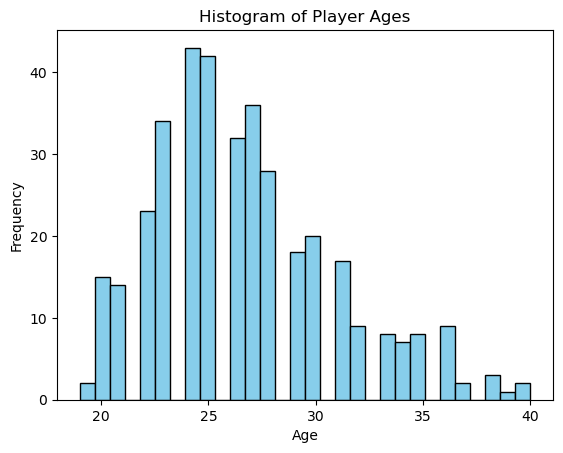

In [40]:
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Player Ages')
plt.show()


#### Observation :

**1. Youth Representation:** The presence of players as young as 19 reflects the NBA's ability to attract and develop young talent. These young players likely bring agility and potential for long-term growth to their respective teams.

**2. Experience and Leadership:** On the other end of the spectrum, the inclusion of players up to 40 years old suggests that experienced veterans continue to have a meaningful impact in the league. Such players bring leadership, experience, and valuable mentorship to younger teammates, contributing to the overall dynamics of their teams.

**3. Career Span:** The age range also signifies the extensive career span of basketball players in the NBA, showcasing the potential for a player's professional career to last for several decades if they maintain their physical and skill abilities.

**4. Performance and Skills:** The range from 19 to 40 encompasses different stages of physical ability, skill proficiency, and experience, which impacts individual players' on-court performance, playing style, and value to their respective teams.

- Create a boxplot of player salaries for each 'position'.

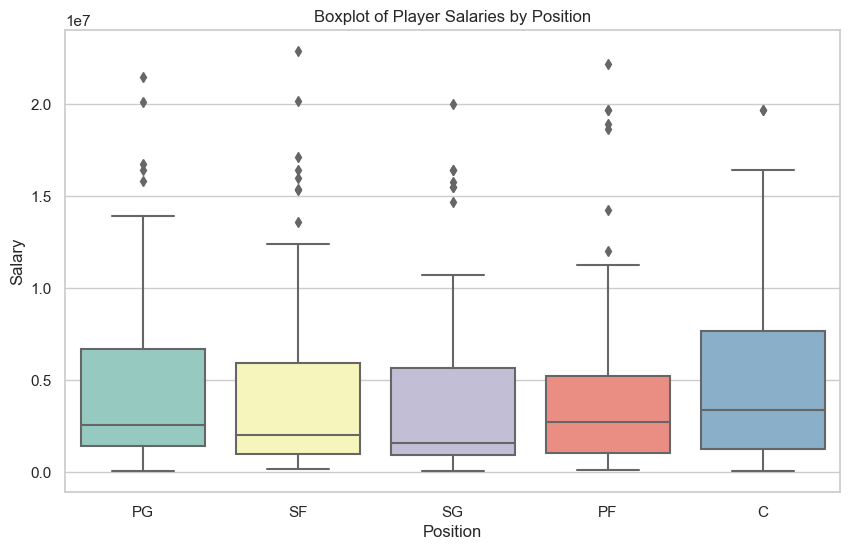

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Salary', data=df, palette='Set3')
plt.title('Boxplot of Player Salaries by Position')
plt.show()

#### Observations :

**1. Range of Salaries:** The boxplot illustrates the distribution of player salaries within each position. It's evident that each position, including point guard (PG), small forward (SF), shooting guard (SG), power forward (PF), and center (C), encompasses a diverse range of salaries.

**2. Median Salaries:** The position of the median salary (denoted by the line within each box) varies across positions, indicating differences in the central tendency of salaries for each position.

**3. Salary Disparities:** The length of the boxes and the position of the whiskers suggest variations in the spread and range of salaries among different positions. Some positions exhibit a wider spread of salaries, while others have a more compact distribution.

**4. Outliers:** The presence of outliers, represented as individual points beyond the whiskers, indicates the existence of exceptional salary figures for specific players within each position.

**5. Positional Disparities:** There are apparent differences in the distribution of salaries among the positions, with certain positions showing a generally higher or lower salary range compared to others.0

- Plot a scatter plot of 'age' vs. 'salary' with a different color for each 'position'.

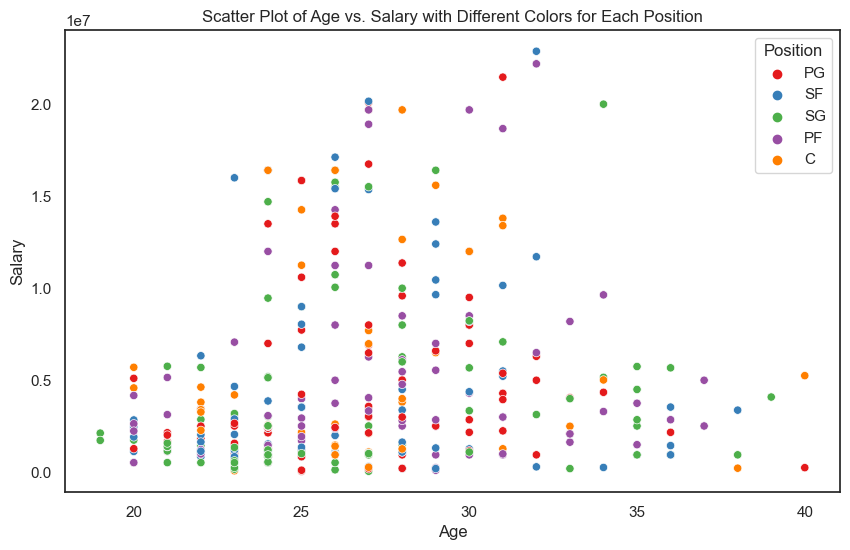

In [42]:
plt.figure(figsize=(10, 6))
sns.set_style("white") 
sns.scatterplot(x='Age', y='Salary', hue='Position', data=df, palette='Set1')
plt.title('Scatter Plot of Age vs. Salary with Different Colors for Each Position')
plt.show()

#### Observations:

**1. Age vs. Salary Distribution:** The scatter plot depicts the relationship between player age and salary, with each data point color-coded to represent the player's position (PG, SF, SG, PF, C). There is noticeable variability in both age and salary across all positions.

**2. Positional Salary Ranges:** The plot reveals that players from different positions (PG, SF, SG, PF, C) demonstrate varying salary distributions at different ages. The spread of salaries and ages for each position varies, indicating that positions have distinct salary tendencies across different age groups.

**3. Potential Outliers:** Some positions exhibit outliers in specific age groups, displaying exceptionally high or low salaries compared to the general trend within their position.

**4. Salary Trends:** While there is visible dispersion, there may be discernible trends in salary changes as players age within each position, which could indicate potential career trajectories.

**5. Positional Comparisons:** Comparing the distributions of salaries and ages across different player positions allows for insights into how salaries vary between positions at different age ranges.

#### 6. Top Players

- Display the top 10 players with the highest salaries

In [43]:
top_10_salaries = df.nlargest(10, 'Salary')

print(top_10_salaries[['Name', 'Salary']])

                  Name      Salary
33     Carmelo Anthony  22875000.0
339         Chris Bosh  22192730.0
100         Chris Paul  21468695.0
414       Kevin Durant  20158622.0
164       Derrick Rose  20093064.0
349        Dwyane Wade  20000000.0
23         Brook Lopez  19689000.0
98      DeAndre Jordan  19689000.0
174         Kevin Love  19689000.0
294  LaMarcus Aldridge  19689000.0


#### Observations:

**1. Top Earners:** The provided players, including Carmelo Anthony, Chris Bosh, Chris Paul, Kevin Durant, and others, are among the highest-earning players in terms of salary in the NBA.

**2. Salary Equality:** It's noteworthy that several players, such as Brook Lopez, DeAndre Jordan, and Kevin Love, are earning the same salary amount, indicating potential consistency in compensation among players.

#### 7. College Analysis:

- Determine the top 5 colleges with the most represented players.


In [44]:
top_5_college = df['College'].value_counts().head(5)

print(top_5_college)

Kentucky          22
Duke              20
Kansas            18
North Carolina    16
UCLA              15
Name: College, dtype: int64


#### Observations:

**1. Leading Colleges:** Kentucky and Duke stand out as the top two colleges with the highest number of represented players, boasting 22 and 20 players respectively.

**2. Significant Representation:** Kansas, North Carolina, and UCLA also demonstrate substantial representation, with 18, 16, and 15 players respectively, showcasing their prominence in contributing players to the basketball league.

#### 8. Position Distribution:

- Plot a pie chart to show the distribution of players across different 'positions'.

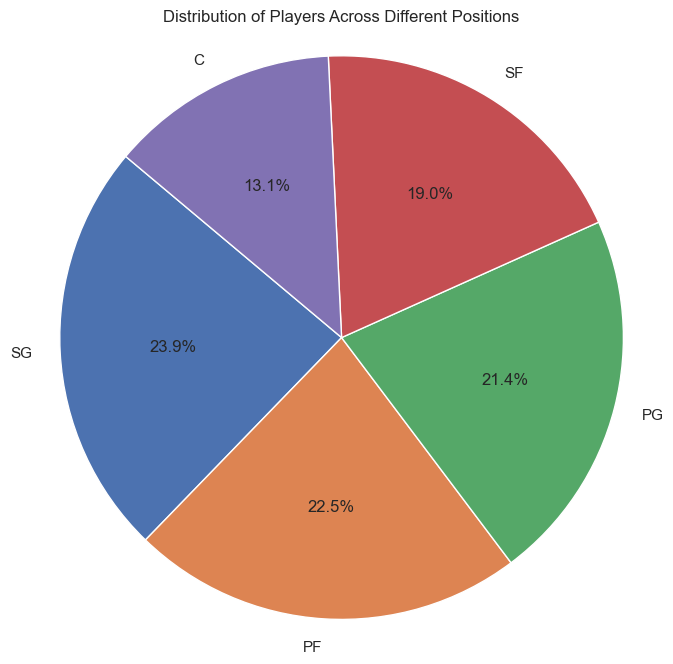

In [45]:
position_counts = df['Position'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Players Across Different Positions')
plt.show()

#### 9. Team Analysis:

- Display the average salary of players for each 'team'.

- Plot a bar chart to visualize the average salary of players for each 'team'.

In [46]:
average_salary_by_team = df.groupby('Team')['Salary'].mean().astype(int).sort_values(ascending=False)

print(average_salary_by_team)

Team
Golden State Warriors     6711293
Los Angeles Clippers      6707636
Cleveland Cavaliers       6381969
Miami Heat                6213960
Chicago Bulls             6105483
Oklahoma City Thunder     5822521
Toronto Raptors           5737712
San Antonio Spurs         5408293
New York Knicks           5270654
Utah Jazz                 5225649
Atlanta Hawks             5125754
Sacramento Kings          4829759
Milwaukee Bucks           4771039
Dallas Mavericks          4761692
Detroit Pistons           4477884
Houston Rockets           4404132
New Orleans Pelicans      4262525
Denver Nuggets            4240885
Washington Wizards        4008557
Indiana Pacers            4004800
Charlotte Hornets         3978124
Memphis Grizzlies         3936743
Orlando Magic             3788728
Brooklyn Nets             3654086
Phoenix Suns              3457318
Boston Celtics            3388962
Los Angeles Lakers        3270444
Portland Trail Blazers    3220121
Minnesota Timberwolves    2647292
Philadelp

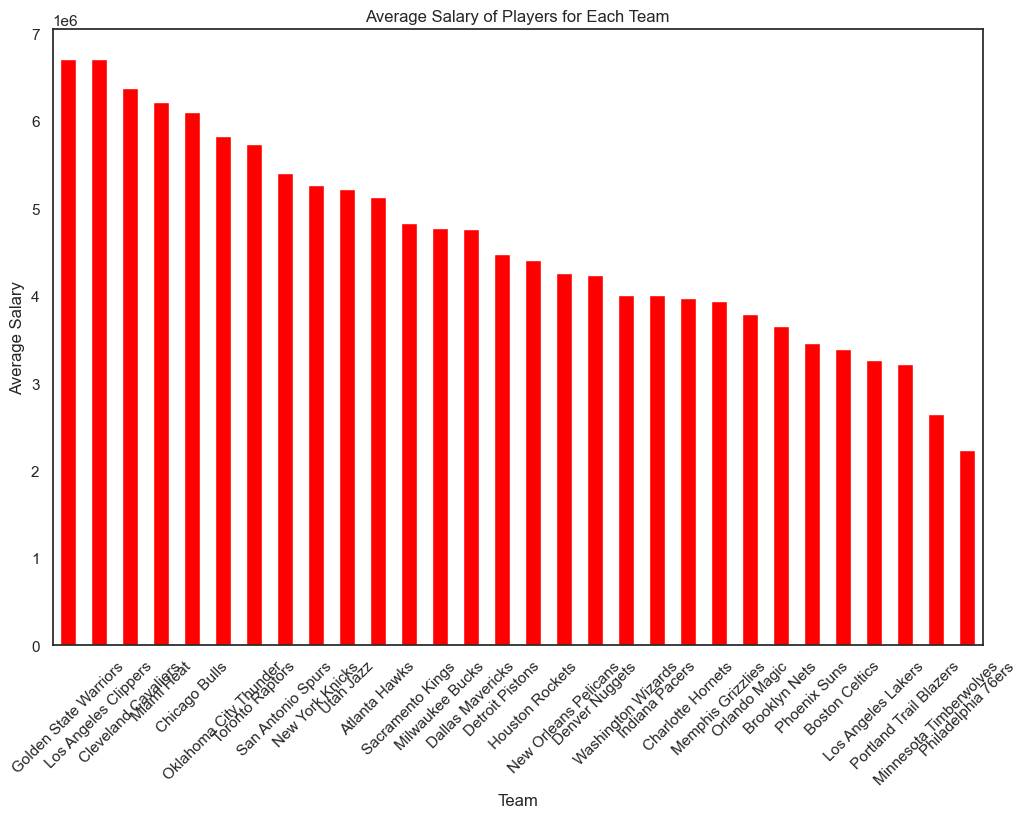

In [47]:
plt.figure(figsize=(12, 8))
average_salary_by_team.plot(kind='bar', color='red')
plt.title('Average Salary of Players for Each Team')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

#### Observations for Pie Chart:

**1. Distribution of Salary Spending:** The pie chart represents the distribution of total average salaries across all NBA teams. It allows for a quick visual comparison of the relative spending of each team in relation to the total.

**2. Top Spending Teams:** The pie chart highlights the top spending teams such as the Golden State Warriors, Los Angeles Clippers, and Cleveland Cavaliers, showcasing their relatively higher allocation of resources towards player salaries.

**3. Concentrated Spending:** A few teams appear to account for a substantial portion of the total salary spending, while the majority of teams contribute smaller proportions to the overall pie.

#### Observations for Bar Chart:

**1. Salary Disparities:** The bar chart provides a detailed comparison of the average salaries of players for each NBA team. It illustrates the considerable differences in salary spending across the league, with some teams notably investing significantly more in player salaries compared to others.

**2. High vs. Low Spenders:** The chart allows for clear identification of high-spending teams like the Golden State Warriors and Los Angeles Clippers, as well as lower-spending teams such as the Philadelphia 76ers and Minnesota Timberwolves.

**3. Financial Strategies:** It indicates variations in the financial strategies of different teams and their willingness to invest in player salaries, potentially reflecting their competitiveness or financial objectives.

#### 10. Extras


- Get the index at which the minimum weight value is present.


In [48]:
min_weight = df['Weight'].min()
print(min_weight)

161


In [49]:
min_weight_index = df['Weight'].idxmin(axis=0)
print(min_weight_index)

152


- Sort values based on name in alphabetical order for the rows (the original Dataframe sorting should not change)

In [50]:
sorted_df = df.sort_values('Name')
pd.DataFrame(sorted_df)

,Name,Team,Number,Position,Age,Weight,College,Salary,BMI
152,Aaron Brooks,Chicago Bulls,0,PG,31,161,Oregon,2250000.0,23.098571
356,Aaron Gordon,Orlando Magic,0,PF,20,220,Arizona,4171680.0,31.563265
328,Aaron Harrison,Charlotte Hornets,9,SG,21,210,Kentucky,525093.0,30.128571
404,Adreian Payne,Minnesota Timberwolves,33,PF,25,237,Michigan State,1938840.0,34.002245
312,Al Horford,Atlanta Hawks,15,C,30,245,Florida,12000000.0,35.150000
...,...,...,...,...,...,...,...,...,...
25,Willie Reed,Brooklyn Nets,33,PF,26,220,Saint Louis,947276.0,31.563265
386,Wilson Chandler,Denver Nuggets,21,SF,29,225,DePaul,10449438.0,32.280612
270,Xavier Munford,Memphis Grizzlies,14,PG,24,180,Rhode Island,2515440.0,25.824490
402,Zach LaVine,Minnesota Timberwolves,8,PG,21,189,UCLA,2148360.0,27.115714


- Create a series from given dataframe on “name” column and display top and last 10

In [51]:
name_series = df['Name']

In [52]:
print(name_series.head(10))

0       Avery Bradley
1         Jae Crowder
2        John Holland
3         R.J. Hunter
6       Jordan Mickey
7        Kelly Olynyk
8        Terry Rozier
9        Marcus Smart
10    Jared Sullinger
11      Isaiah Thomas
Name: Name, dtype: object


In [53]:
print(name_series.tail(10))

442     Trevor Booker
443        Trey Burke
444        Alec Burks
446    Derrick Favors
448    Gordon Hayward
449       Rodney Hood
451     Chris Johnson
452        Trey Lyles
453      Shelvin Mack
456       Jeff Withey
Name: Name, dtype: object
